In [1]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


['/job:localhost/replica:0/task:0/device:GPU:0']

In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 3))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Flatten()(x)
encoded = Dense(2, activation = 'relu')(x)

decoded = Dense(256, activation ='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(2352, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [3]:
encoder = Model(input_img, encoded)

In [4]:
dat = 'hmnist_dat/hmnist_28_28_RGB.csv'

In [5]:
from numpy import genfromtxt
my_data = genfromtxt(dat, delimiter=',')

In [6]:
import pandas as pd
df = pd.read_csv(dat)

In [7]:
test_class = df.loc[df['label']==4]

In [8]:
test_class.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
3750,40,11,32,73,20,51,50,15,39,30,...,81,31,71,68,21,57,37,13,37,4
3751,177,113,155,130,83,135,148,107,151,211,...,86,42,93,111,53,104,183,124,164,4
3752,99,45,94,169,96,141,111,58,107,151,...,162,104,151,171,107,153,168,97,146,4
3753,186,148,174,146,116,138,46,21,56,30,...,81,47,103,52,28,79,107,68,119,4
3754,75,17,45,76,16,44,62,15,41,80,...,37,9,33,69,16,45,62,16,45,4


In [9]:
my_data.shape

(5001, 2353)

In [10]:
my_data = my_data[1:, :my_data.shape[1]-1]
my_data = my_data/255

In [11]:
my_data.shape
x_train = my_data

In [12]:
my_data.shape

(5000, 2352)

In [13]:
x_train.shape

(5000, 2352)

In [14]:
import numpy as np

In [15]:
x_train = np.reshape(x_train, (len(x_train), 28, 28, 3))

In [16]:
autoencoder.fit(x_train, my_data,
                epochs=300,
                batch_size=128,
                shuffle=True,
                #validation_data=(x_test, x_test),
               )

Epoch 1/300
5000/5000 [==============================] - 2s 462us/step - loss: 0.6930
Epoch 2/300
5000/5000 [==============================] - 0s 89us/step - loss: 0.6928
Epoch 3/300
5000/5000 [==============================] - 0s 89us/step - loss: 0.6926
Epoch 4/300
5000/5000 [==============================] - 0s 88us/step - loss: 0.6923
Epoch 5/300
5000/5000 [==============================] - 0s 91us/step - loss: 0.6919
Epoch 6/300
5000/5000 [==============================] - 0s 83us/step - loss: 0.6913
Epoch 7/300
5000/5000 [==============================] - 0s 80us/step - loss: 0.6864
Epoch 8/300
5000/5000 [==============================] - 0s 83us/step - loss: 0.6532
Epoch 9/300
5000/5000 [==============================] - 0s 83us/step - loss: 0.6108
Epoch 10/300
5000/5000 [==============================] - 0s 83us/step - loss: 0.5869
Epoch 11/300
5000/5000 [==============================] - 0s 81us/step - loss: 0.5829
Epoch 12/300
5000/5000 [==============================] - 0s 8

5000/5000 [==============================] - 0s 89us/step - loss: 0.5413
Epoch 97/300
5000/5000 [==============================] - 0s 91us/step - loss: 0.5414
Epoch 98/300
5000/5000 [==============================] - 0s 85us/step - loss: 0.5413
Epoch 99/300
5000/5000 [==============================] - 0s 88us/step - loss: 0.5415
Epoch 100/300
5000/5000 [==============================] - 0s 87us/step - loss: 0.5411
Epoch 101/300
5000/5000 [==============================] - 0s 84us/step - loss: 0.5413
Epoch 102/300
5000/5000 [==============================] - 0s 87us/step - loss: 0.5409
Epoch 103/300
5000/5000 [==============================] - 0s 87us/step - loss: 0.5411
Epoch 104/300
5000/5000 [==============================] - 0s 85us/step - loss: 0.5409
Epoch 105/300
5000/5000 [==============================] - 0s 85us/step - loss: 0.5410
Epoch 106/300
5000/5000 [==============================] - 0s 82us/step - loss: 0.5410
Epoch 107/300
5000/5000 [==============================] - 0

5000/5000 [==============================] - 0s 79us/step - loss: 0.5405
Epoch 191/300
5000/5000 [==============================] - 0s 78us/step - loss: 0.5405
Epoch 192/300
5000/5000 [==============================] - 0s 78us/step - loss: 0.5405
Epoch 193/300
5000/5000 [==============================] - 0s 78us/step - loss: 0.5401
Epoch 194/300
5000/5000 [==============================] - 0s 79us/step - loss: 0.5403
Epoch 195/300
5000/5000 [==============================] - 0s 81us/step - loss: 0.5404
Epoch 196/300
5000/5000 [==============================] - 0s 81us/step - loss: 0.5402
Epoch 197/300
5000/5000 [==============================] - 0s 76us/step - loss: 0.5404
Epoch 198/300
5000/5000 [==============================] - 0s 80us/step - loss: 0.5405
Epoch 199/300
5000/5000 [==============================] - 0s 81us/step - loss: 0.5405
Epoch 200/300
5000/5000 [==============================] - 0s 79us/step - loss: 0.5403
Epoch 201/300
5000/5000 [==============================] 

5000/5000 [==============================] - 0s 80us/step - loss: 0.5393
Epoch 285/300
5000/5000 [==============================] - 0s 84us/step - loss: 0.5396
Epoch 286/300
5000/5000 [==============================] - 0s 82us/step - loss: 0.5396
Epoch 287/300
5000/5000 [==============================] - 0s 79us/step - loss: 0.5394
Epoch 288/300
5000/5000 [==============================] - 0s 86us/step - loss: 0.5396
Epoch 289/300
5000/5000 [==============================] - 0s 82us/step - loss: 0.5396
Epoch 290/300
5000/5000 [==============================] - 0s 83us/step - loss: 0.5397
Epoch 291/300
5000/5000 [==============================] - 0s 82us/step - loss: 0.5396
Epoch 292/300
5000/5000 [==============================] - 0s 79us/step - loss: 0.5395
Epoch 293/300
5000/5000 [==============================] - 0s 81us/step - loss: 0.5399
Epoch 294/300
5000/5000 [==============================] - 0s 86us/step - loss: 0.5396
Epoch 295/300
5000/5000 [==============================] 

In [17]:
x_test = x_train[4:14, :]

In [18]:
import matplotlib.pyplot as plt

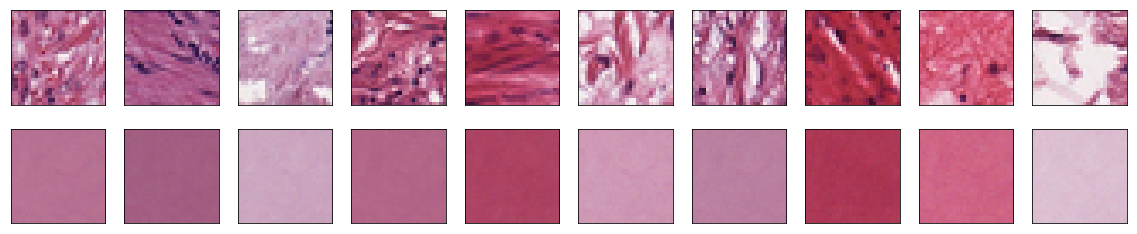

In [19]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [20]:
encoder = Model(input_img, encoded)

In [21]:
encodes = encoder.predict(x_train)

In [22]:
encodes.shape

(5000, 2)

In [23]:
w = encodes

In [24]:
encodes

array([[12.890277,  9.747913],
       [12.283095, 26.445608],
       [11.490297,  9.440163],
       ...,
       [ 9.749591, 16.580608],
       [10.257392, 12.571283],
       [ 8.490222, 19.52843 ]], dtype=float32)

In [25]:
from sklearn.decomposition import PCA

In [26]:
from sklearn.manifold import TSNE

In [27]:
pca_1 = PCA(n_components = 2)

In [28]:
plot_pcs = pca_1.fit_transform(w)

In [29]:
pc_df = pd.DataFrame(plot_pcs)
pc_df['label'] = df['label']

In [30]:
class_colors = ["C" + str(i) for i in df['label']]

In [31]:
plot_pcs.shape

(5000, 2)

In [32]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


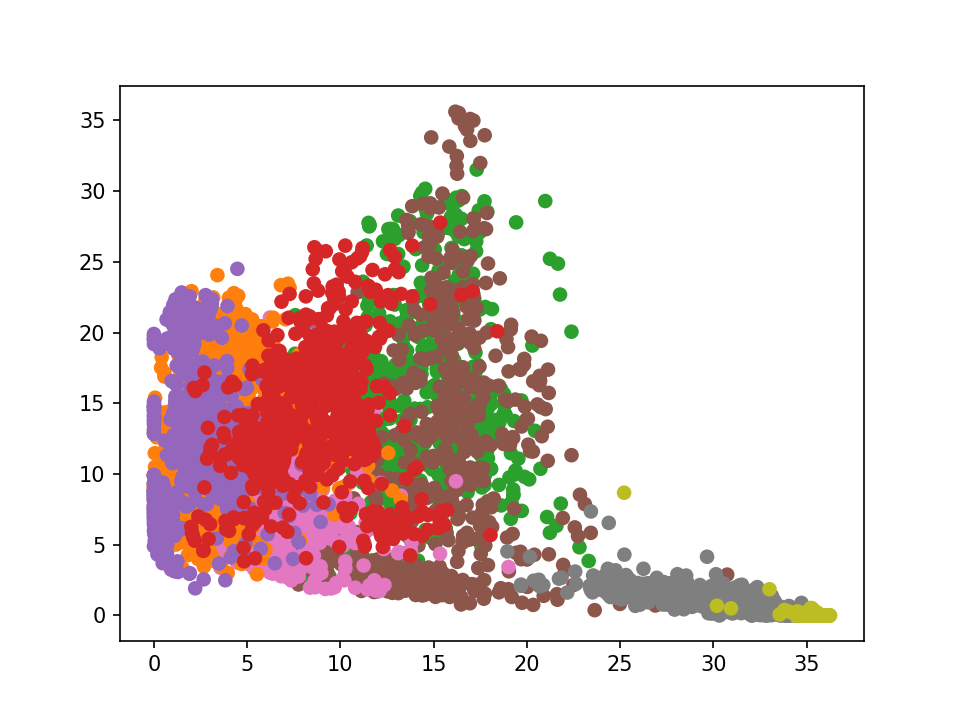

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(encodes[:, 0], encodes[:, 1], c = class_colors)

In [34]:
tsne = TSNE(n_components = 3)

In [35]:
a_tsne = tsne.fit_transform(plot_pcs)

<IPython.core.display.Javascript object>


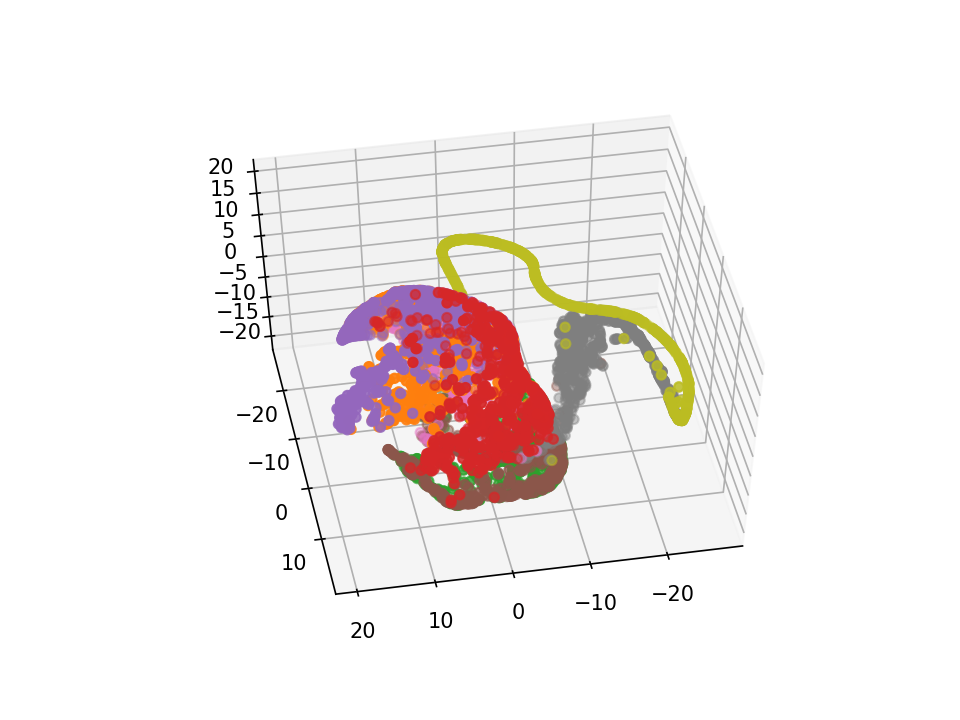

In [38]:
% matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(a_tsne[:, 0], a_tsne[:, 1], a_tsne[:,2], c = class_colors)

<IPython.core.display.Javascript object>


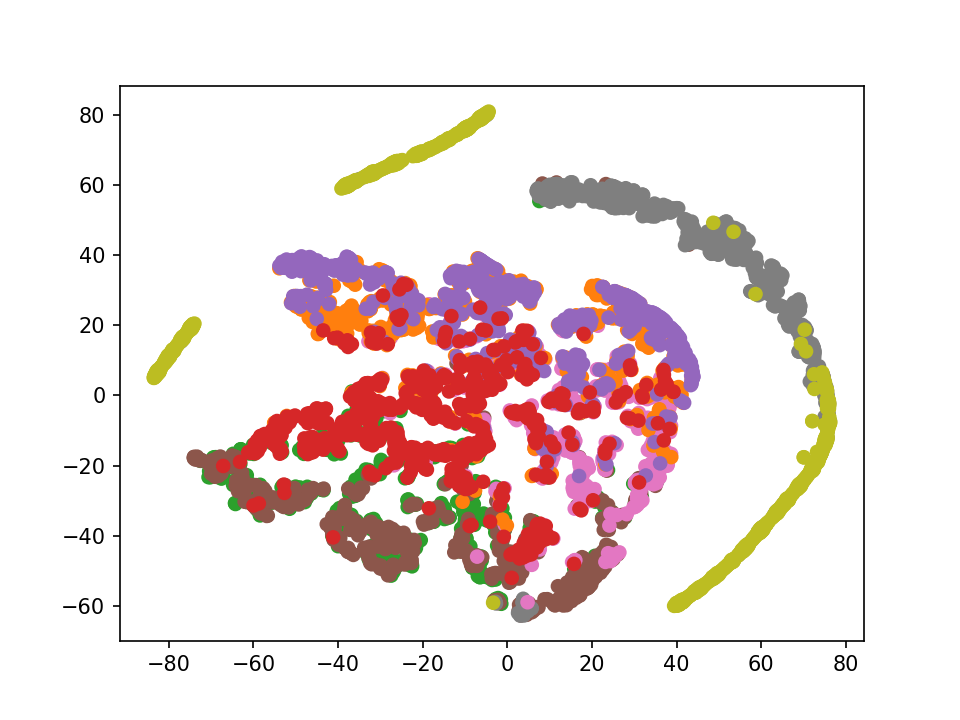

In [40]:
tsne = TSNE(n_components = 2)
a_tsne = tsne.fit_transform(encodes)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(a_tsne[:, 0], a_tsne[:, 1], c = class_colors)